In [2]:
# -*- coding: utf-8 -*-
"""
Demo of unicode support in text and labels.
"""
from __future__ import unicode_literals

import mymaps
reload(mymaps)
#reload(setupMaps)
from mymaps import *
%matplotlib inline
import pylab
from datetime import datetime
from dateutil import tz
import pytz

def get_time(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')
    return time.mktime(date.timetuple()) + date.microsecond / 1E6

def mjd_from_unix(unixSec):
    return (unixSec / 86400. + 40587.) 

def unix_from_mjd(mjd):
    return 86400*(mjd - 40587) 

def time_from_unix(s):
    return datetime.fromtimestamp(s,tz=pytz.utc)

def is_night(t):
    return t.hour < 6 or t.hour > 18



mx = pytz.timezone('America/Mexico_City')

## You could use `tzlocal` module to get local timezone on Unix and Win32
# from tzlocal import get_localzone # $ pip install tzlocal

# # get local timezone    
# local_tz = get_localzone()

def utc_to_mx(utc_dt):
    return utc_dt.replace(tzinfo=pytz.utc).astimezone(mx)

#mx.normalize(local_dt) # .normalize might be unnecessary

In [3]:
def clean(x):
    if x<0: return 0.
    return x

smooth_rad=3.*degree

def get_hist_dec(data, bg, minRA=-80 * degree, maxRA=80 * degree, binsize=1):
    y0 = []
    weights = []
    errors = []

    minbin = int(minRA / degree)
    maxbin = int(maxRA / degree)
    array_size = (maxbin - minbin) / binsize
    npix = data.size
    nside = healpy.npix2nside(npix)

    print (minbin, maxbin, binsize)
    for ipix in xrange(data.size):
        theta, phi = healpy.pix2ang(nside, ipix)
        thetaprime = 90 - (theta) / degree
        y0.append(thetaprime)
        weights.append(data[ipix])

    return (y0, weights)

In [4]:
hawc_full = healpy.smoothing(healpy.read_map(
                "/data/maps/hawc.v8nocuts/data_HAWC_64_360.fits"),
                             sigma=smooth_rad)
hawcfull256 = hp.ud_grade(hawc_full,nside_out=256)
hawcfull256 *= sum(hawc_full)/sum(hawcfull256)

NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Sigma is 180.000000 arcmin (0.052360 rad) 
-> fwhm is 423.867608 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [5]:
mindec=-90 * degree
maxdec=90 * degree
binsize=5
nbins = (maxdec-mindec)/binsize/degree

y1, weights = get_hist_dec(hawcfull256, hawcfull256, binsize=binsize, minRA=mindec, maxRA=maxdec)
n, bins = np.histogram(
               np.array(y1), nbins, weights=np.array(weights))
yerr, errbins = np.histogram(
               np.array(y1), nbins, weights=1.0/np.array(weights))
xaxis = np.array(errbins[0:-1]) + binsize*.5 + mindec

(-90, 90, 5)


/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


36 36 37


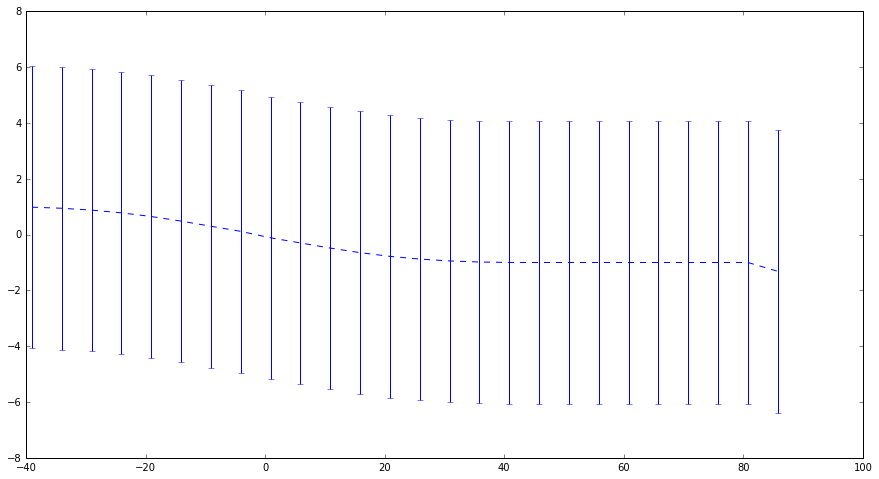

In [71]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
xi = xaxis[0:len(xaxis)/2]
nr = n[::-1] 
nij = (nr - n)/(nr+n)
p = ax.errorbar(xaxis[10:] , nij[10:], yerr=np.sqrt(yerr[10]), fmt="--", label='dec',color='blue')

print len(yerr),len(nij), len(errbins)

NSIDE = 64
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Sigma is 180.000000 arcmin (0.052360 rad) 
-> fwhm is 423.867608 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
90.0 -90.0 36.0 286.478897565
(-90, 90, 5)
36 37
HAWC300 min -10.0187610961
HAWC300 max 3469970.92447
loc -2.5 3.00003e+11 


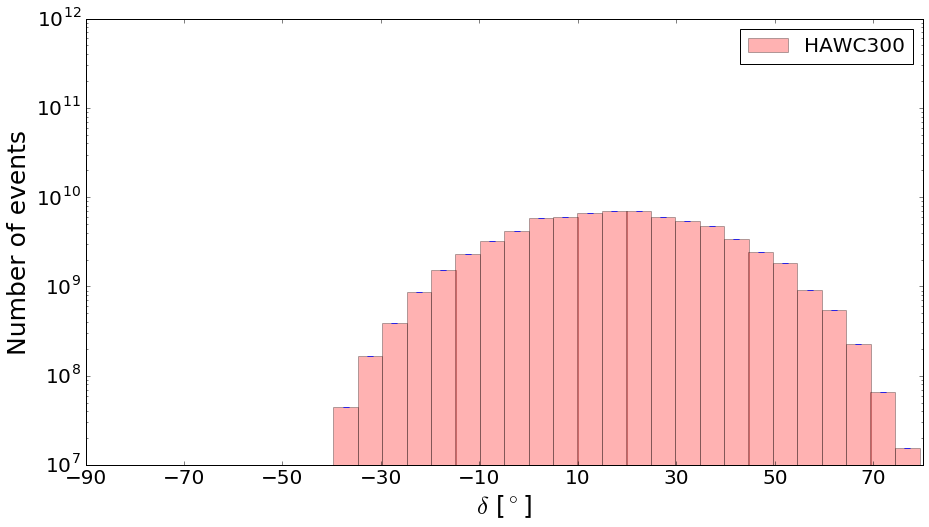

In [7]:


#hawc no cuts
hawc_full = healpy.smoothing(healpy.read_map(
                "/data/maps/hawc.v8nocuts/data_HAWC_64_360.fits"),
                             sigma=smooth_rad)

hist_proj_dec([hawc_full],
                [hawc_full],
                ['HAWC300'], 
                title='',
                binsize=5,
                log_scale=True,
                fmts=['^','^','s','s'],
                xmin=-90,
                xmax=80,
                ymin=1e7,
                ymax=1e12,
             )



In [50]:
rates = np.load('HAWC_combined_counts.npy')
cut_rates = np.load('HAWC_v8.sdp.combined_counts.npy')
pressures = np.load('/data/hawc/weather_monitoring/combined/HAWC_combined_pressures.npy')

In [51]:

x = np.array(map(lambda r:r[0],rates))
y = np.array(map(lambda r:r[2],rates))
filtered_cut_rates = [i for i in cut_rates if i[2] >= 300 and i[2] < 450]
#filtered_cut_rates = cut_rates
xc = np.array(map(lambda r:r[0],filtered_cut_rates))
yc = np.array(map(lambda r:r[2],filtered_cut_rates))

xp = np.array(map(lambda r:r[0],pressures))
yp = np.array(map(lambda r:r[1],pressures))

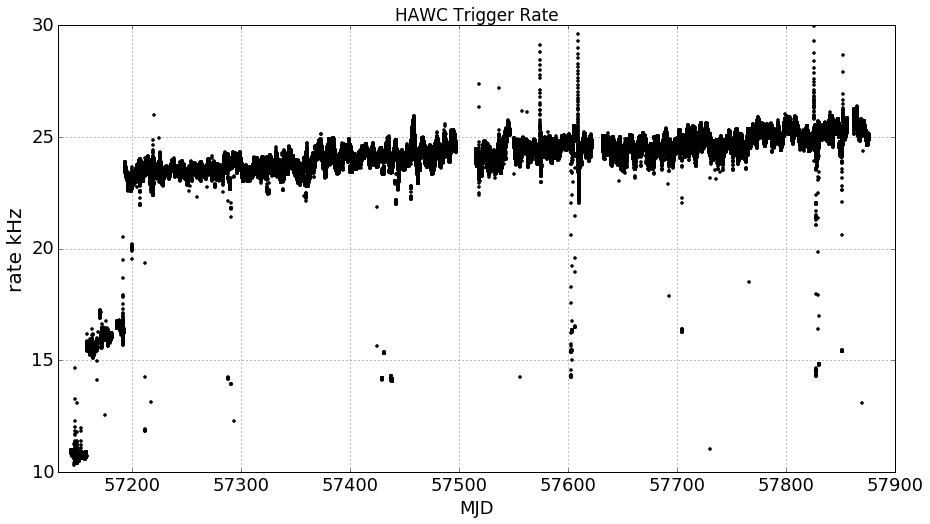

In [10]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
p = ax.plot(x , y/1e3, ".", label='dec',color='black')
ax.set_ylim(10, 30)
ax.set_xlim(57132, 57900)
plt.xlabel('MJD',fontsize=18); plt.ylabel('rate kHz',fontsize=20); #plt.grid()
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

ax.grid(True)
#x.set_title('Orientation relative to North: %u$^\circ$'%angle)
plt.title('HAWC Trigger Rate',fontsize=17)
#fig.savefig("imagenes/CRAI3HW2yr_ang_power_spectrum.pdf", dpi=100)

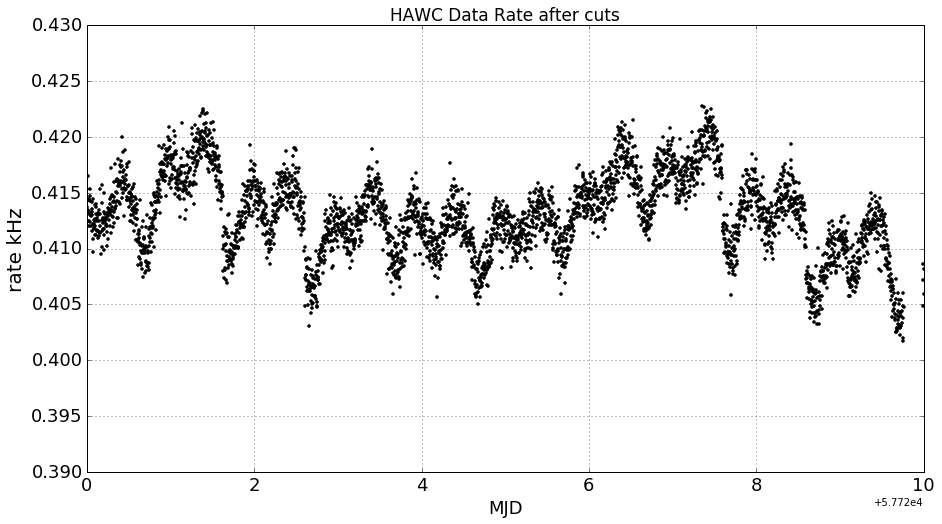

In [11]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
p = ax.plot(xc, yc/1e3, ".", label='dec',color='black')
ax.set_ylim(.39, .43)
#ax.set_xlim(57132, 57900)
ax.set_xlim(57720, 57730)
plt.xlabel('MJD',fontsize=18); plt.ylabel('rate kHz',fontsize=20); #plt.grid()
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

ax.grid(True)
#x.set_title('Orientation relative to North: %u$^\circ$'%angle)
plt.title('HAWC Data Rate after cuts',fontsize=17)
#fig.savefig("imagenes/CRAI3HW2yr_ang_power_spectrum.pdf", dpi=100)

In [12]:
print xp[0]

57143.0


In [13]:
hr, br = numpy.histogram(xc, bins=1051200, weights=yc)
hp, bp = numpy.histogram(xp, bins=1051200, weights=yp)

In [14]:
print br[0],hr[0],bp[0],hp[0]

57143.8922 384.049 57143.0 1249.036


In [15]:
print xc[0],xc[-1]
print xp[0],xp[-1]

57143.8922 57874.5039
57143.0 57873.9993056


In [16]:
i = 0
while xp[i] < xc[0]:
    i += 1
print i,xp[i]
j = -1
while xp[-1] < xc[j]:
    j -= 1
print j,xc[j]

1285 57143.8923611
-184 57873.9969


In [17]:

hr, br = numpy.histogram(xc[0:-184], bins=232006, weights=yc[0:-184])
hrc, brc = numpy.histogram(xc[0:-184], bins=232006)
hp, bp = numpy.histogram(xp[1285:], bins=232006, weights=yp[1285:])
hpc, bpc = numpy.histogram(xp[1285:], bins=232006)

In [18]:
hrm = hr/hrc
hpm = hp/hpc

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


In [19]:
print hrm.mean()
print hpm.mean()

nan
nan


In [20]:
print len(xc[0:-184]),len(xp[1285:])

232006 1051302


In [21]:
rates = []
pressures = []
bins = []

for i in range(len(xc[0:-184])):
    if not np.isnan(hrm[i]) and not np.isnan(hpm[i]):
        rates.append(hrm[i])
        pressures.append(hpm[i])
        bins.append(bp[i])
    

In [39]:
r = np.array(rates)
p = np.array(pressures)
rmean = r.mean()

In [23]:
def corr(r,p):
    n = len(r)
    if n != len(p): raise 'Incompatibles sizes: %u, %u' %(n,len(p))
    rmu = r.mean();pmu = p.mean()
    rstd = r.std();pstd = p.std()
    
    x = 0
    n = len(r)
    for i in range(n):
        x += (r[i]-rmu)*(p[i]-pmu)
    return x/rstd/pstd/(n-1)


In [24]:
rpcorr = corr(r,p)
print rpcorr
rpcorr = corr(np.log(r),p)
print rpcorr

rpcorr =  -0.0077

A = np.vstack([p, np.ones(len(p))]).T
print A
m, c = np.linalg.lstsq(A, np.log(r))[0]

print (m,c)
print np.exp(c),r.mean(), 

rpcorr = m



-0.328541565178
-0.317636100117
[[ 625.331     1.    ]
 [ 625.3105    1.    ]
 [ 625.2004    1.    ]
 ..., 
 [ 627.668     1.    ]
 [ 627.6964    1.    ]
 [ 627.6476    1.    ]]
(-0.0071324171508590842, 10.462988168924383)
34995.969228 400.048795519


In [25]:
def find_next(a,i,v):
    j = i
    while a[j] < v:
        j += 1
    return j


In [26]:
rmean = r.mean()
print rmean
pmean = p.mean()
xc[0:-184]
ycorr = []

save_rates = []
j = 0
for i in range(len(xc[0:-184])):
    if i > len(yp): break
    j = find_next(xp,j,xc[i])
    #r_corr = yc[i] - (yp[j]-pmean)/rpcorr
    r_corr = yc[i]*np.exp(-rpcorr*(yp[j]-pmean))
    corrfactor = r_corr/yc[i]
    ycorr.append(r_corr)
    save_rates.append([xc[i],yp[j],yc[i],r_corr,corrfactor])
save_rates = np.array(save_rates) 
print save_rates

400.048795519
[[  5.71438922e+04   6.25331000e+02   3.84049000e+02   3.79535958e+02
    9.88248786e-01]
 [  5.71439016e+04   6.25249000e+02   3.86332000e+02   3.81568901e+02
    9.87670970e-01]
 [  5.71439109e+04   6.25168000e+02   3.81953000e+02   3.77026009e+02
    9.87100532e-01]
 ..., 
 [  5.78739886e+04   6.27729000e+02   4.04254000e+02   4.06395216e+02
    1.00529671e+00]
 [  5.78739914e+04   6.27648000e+02   4.04362000e+02   4.06269008e+02
    1.00471609e+00]
 [  5.78739941e+04   6.27729000e+02   4.03715000e+02   4.05853361e+02
    1.00529671e+00]]


In [27]:
np.save('/data/hawc/weather_monitoring/combined/HAWC_rate_pressure.npy', save_rates)

In [28]:
#pressurefile = open('/data/hawc/weather_monitoring/combined/HAWC_rate_pressure.txt','w') 
pressurefile = open('/data/hawc/weather_monitoring/combined/HAWC_pressurecorr.txt','w') 
for x in save_rates:
    print >> pressurefile, "%06.6f,%06.6f,%06.6f"%(x[0],x[1],x[4])
pressurefile.close()    


In [29]:
N=100
cumsum, moving_aves, xa = [0], [], []

for i, x in enumerate(ycorr, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
        xa.append(xc[i-N/2])
moving_aves = np.array(moving_aves)
xa = np.array(xa)

u'\n'

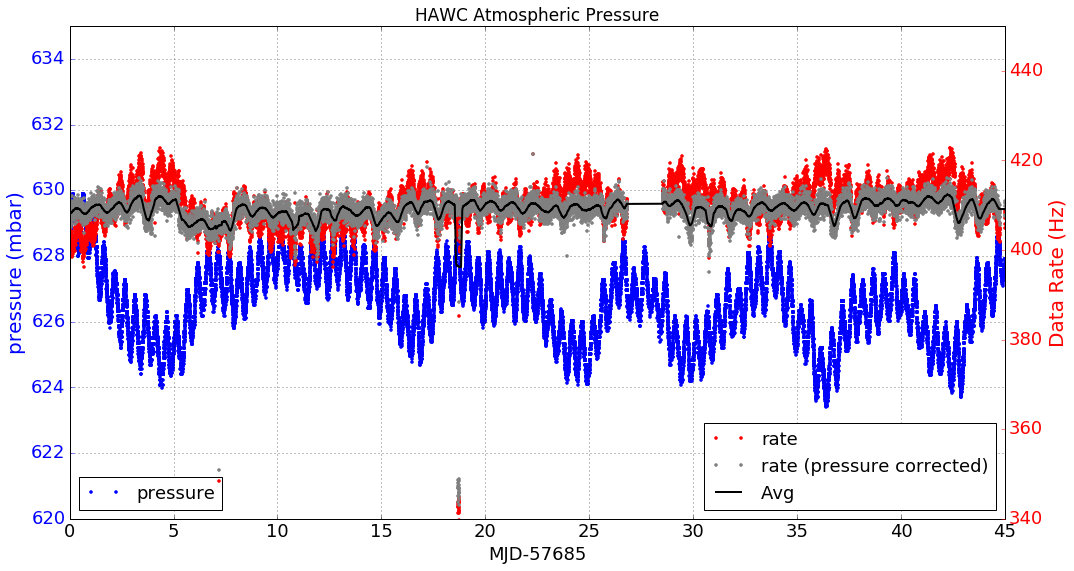

In [30]:


watermark="PRELIMINARY"
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot(111)

xmin=57685
xmax=57730
ax1.plot(xp-xmin ,yp, ".", label='pressure',color='blue')
ax1.set_ylim(620, 635)
#ax.set_xlim(57132, 57900)
ax1.set_xlim(0, xmax-xmin)
#ax1.text(57700, 633, watermark, alpha=0.3,ha= 'left', fontsize=26)


plt.xlabel('MJD-%s'%xmin,fontsize=18); 
ax1.set_ylabel('pressure (mbar)',fontsize=20, color='b')


plt.legend(loc='lower left', numpoints=2, fontsize=18)
plt.grid()
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(18)
ax1.tick_params('y', colors='b')
ax.grid(True)


ax2 = ax1.twinx()
ax2.plot(xc-xmin , yc, ".", label='rate',color='red')

ax2.plot(xc[0:-184]-xmin,np.array(ycorr),".", label='rate (pressure corrected)',color='grey')
ax2.plot(xa-xmin , moving_aves, "-",color='black',label='Avg', linewidth=2)

ax2.set_ylim(340, 450)
ax2.set_xlim(0, xmax-xmin)


ax2.tick_params('y', colors='r')
for item in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(18)
ax2.set_ylabel('Data Rate (Hz)',fontsize=20,color='red'); #
#x.set_title('Orientation relative to North: %u$^\circ$'%angle)
plt.title('HAWC Atmospheric Pressure',fontsize=17)
plt.legend(loc='lower right', numpoints=2, fontsize=18)
fig.tight_layout()
fig.savefig("imagenes/HAWC_pressurecorr.pdf", dpi=100)
"""
"""


400.048795519
[[  5.71438922e+04   6.25331000e+02   3.84049000e+02   3.79004478e+02
    9.86864901e-01]
 [  5.71439016e+04   6.25249000e+02   3.86332000e+02   3.81037890e+02
    9.86296477e-01]
 [  5.71439109e+04   6.25168000e+02   3.81953000e+02   3.76412346e+02
    9.85493886e-01]
 ..., 
 [  5.78739886e+04   6.27729000e+02   4.04254000e+02   4.06508403e+02
    1.00557670e+00]
 [  5.78739914e+04   6.27648000e+02   4.04362000e+02   4.06369858e+02
    1.00496550e+00]
 [  5.78739941e+04   6.27729000e+02   4.03715000e+02   4.05969403e+02
    1.00558414e+00]]


u'\n'

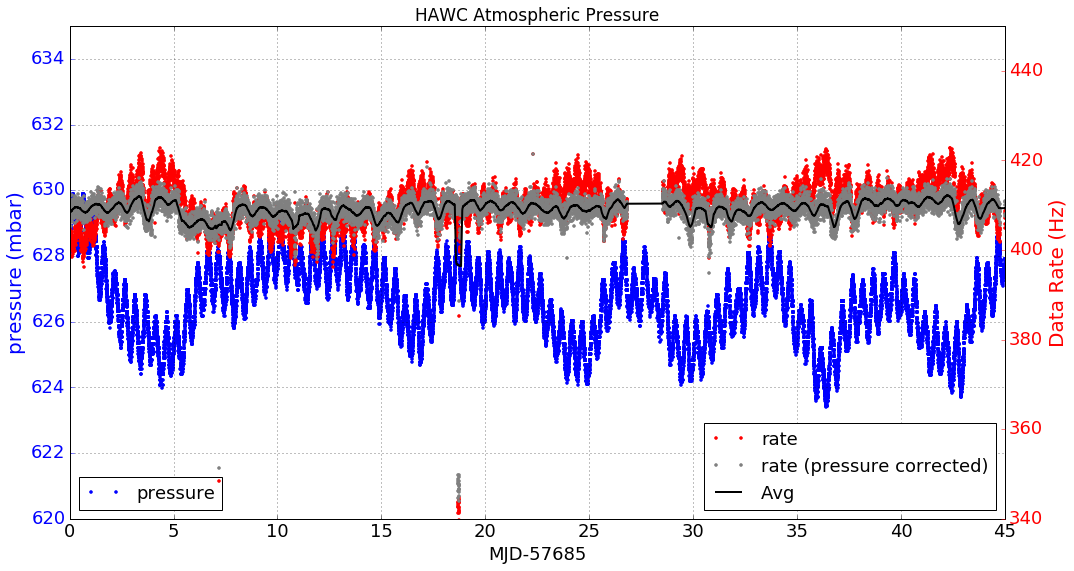

In [40]:

rpcorr = corr(r,p)

rmean = r.mean()
print rmean
pmean = p.mean()
xc[0:-184]
ycorr = []

save_rates = []
j = 0
for i in range(len(xc[0:-184])):
    if i > len(yp): break
    j = find_next(xp,j,xc[i])
    r_corr = yc[i] - (yp[j]-pmean)/rpcorr
    
    corrfactor = r_corr/yc[i]
    ycorr.append(r_corr)
    save_rates.append([xc[i],yp[j],yc[i],r_corr,corrfactor])
save_rates = np.array(save_rates) 
print save_rates



N=100
cumsum, moving_aves, xa = [0], [], []

for i, x in enumerate(ycorr, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
        xa.append(xc[i-N/2])
moving_aves = np.array(moving_aves)
xa = np.array(xa)

watermark="PRELIMINARY"
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot(111)

xmin=57685
xmax=57730
ax1.plot(xp-xmin ,yp, ".", label='pressure',color='blue')
ax1.set_ylim(620, 635)
#ax.set_xlim(57132, 57900)
ax1.set_xlim(0, xmax-xmin)
#ax1.text(57700, 633, watermark, alpha=0.3,ha= 'left', fontsize=26)


plt.xlabel('MJD-%s'%xmin,fontsize=18); 
ax1.set_ylabel('pressure (mbar)',fontsize=20, color='b')


plt.legend(loc='lower left', numpoints=2, fontsize=18)
plt.grid()
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(18)
ax1.tick_params('y', colors='b')
ax.grid(True)


ax2 = ax1.twinx()
ax2.plot(xc-xmin , yc, ".", label='rate',color='red')

ax2.plot(xc[0:-184]-xmin,np.array(ycorr),".", label='rate (pressure corrected)',color='grey')
ax2.plot(xa-xmin , moving_aves, "-",color='black',label='Avg', linewidth=2)

ax2.set_ylim(340, 450)
ax2.set_xlim(0, xmax-xmin)


ax2.tick_params('y', colors='r')
for item in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(18)
ax2.set_ylabel('Data Rate (Hz)',fontsize=20,color='red'); #
#x.set_title('Orientation relative to North: %u$^\circ$'%angle)
plt.title('HAWC Atmospheric Pressure',fontsize=17)
plt.legend(loc='lower right', numpoints=2, fontsize=18)
fig.tight_layout()
fig.savefig("imagenes/HAWC_pressurecorr.pdf", dpi=100)
"""
"""


u'\n'

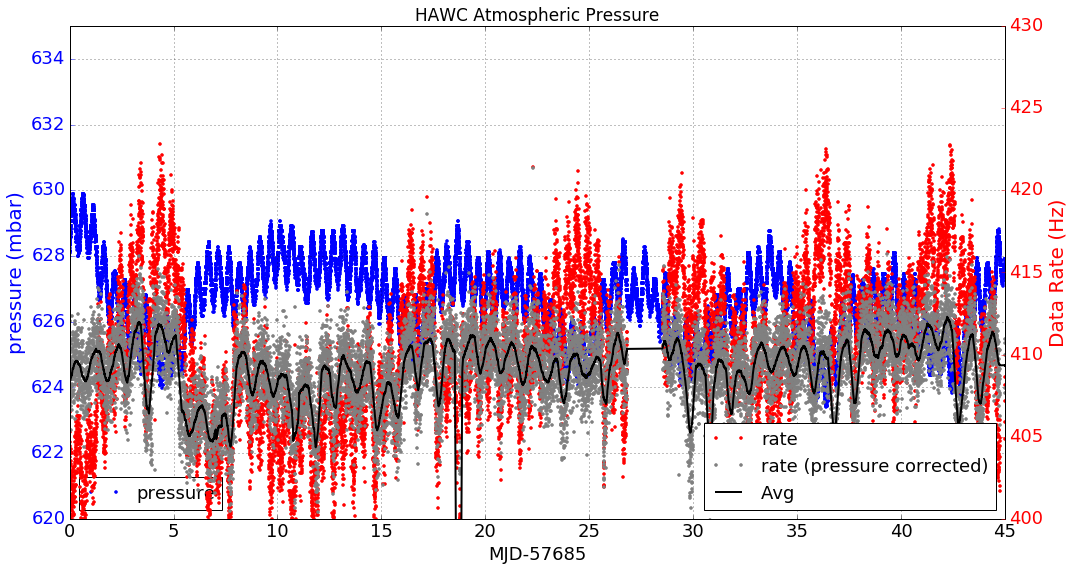

In [32]:


watermark="PRELIMINARY"
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot(111)

xmin=57685
xmax=57730
ax1.plot(xp-xmin ,yp, ".", label='pressure',color='blue')
ax1.set_ylim(620, 635)
#ax.set_xlim(57132, 57900)
ax1.set_xlim(0, xmax-xmin)
#ax1.text(57700, 633, watermark, alpha=0.3,ha= 'left', fontsize=26)


plt.xlabel('MJD-%s'%xmin,fontsize=18); 
ax1.set_ylabel('pressure (mbar)',fontsize=20, color='b')


plt.legend(loc='lower left', numpoints=2, fontsize=18)
plt.grid()
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(18)
ax1.tick_params('y', colors='b')
ax.grid(True)


ax2 = ax1.twinx()
ax2.plot(xc-xmin , yc, ".", label='rate',color='red')

ax2.plot(xc[0:-184]-xmin,np.array(ycorr),".", label='rate (pressure corrected)',color='grey')
ax2.plot(xa-xmin , moving_aves, "-",color='black',label='Avg', linewidth=2)

ax2.set_ylim(400, 430)
ax2.set_xlim(0, xmax-xmin)


ax2.tick_params('y', colors='r')
for item in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(18)
ax2.set_ylabel('Data Rate (Hz)',fontsize=20,color='red'); #
#x.set_title('Orientation relative to North: %u$^\circ$'%angle)
plt.title('HAWC Atmospheric Pressure',fontsize=17)
plt.legend(loc='lower right', numpoints=2, fontsize=18)
fig.tight_layout()
"""
"""


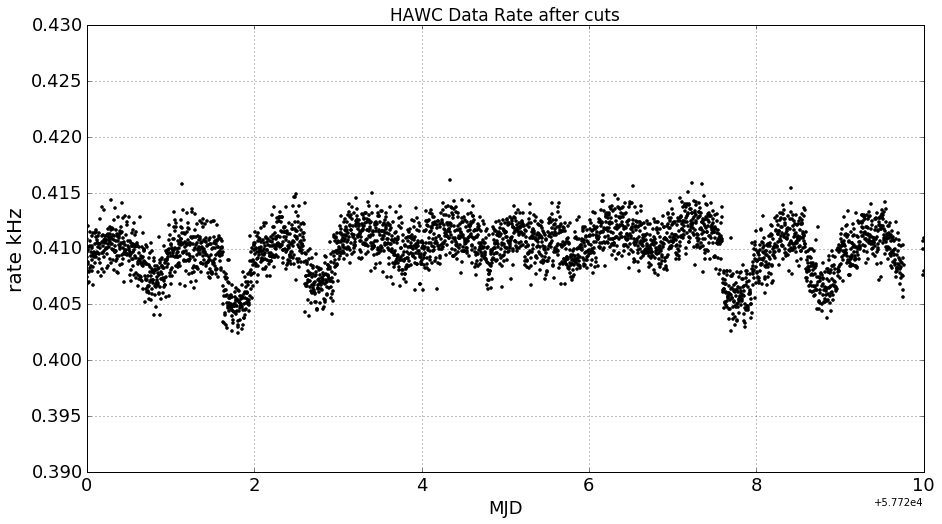

In [33]:
fig = plt.figure(figsize=(15,8))
ax = plt.subplot(111)
ax.plot(xc[0:-184],np.array(ycorr)/1e3,".", label='rate (pressure corrected)',color='black')

ax.set_ylim(.39, .43)
#ax.set_xlim(57132, 57900)
ax.set_xlim(57720, 57730)
plt.xlabel('MJD',fontsize=18); plt.ylabel('rate kHz',fontsize=20); #plt.grid()
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)

ax.grid(True)
#x.set_title('Orientation relative to North: %u$^\circ$'%angle)
plt.title('HAWC Data Rate after cuts',fontsize=17)
#fig.savefig("imagenes/CRAI3HW2yr_ang_power_spectrum.pdf", dpi=100)


{u'mjd': u'MJD', u'trigger_rate': u'Trigger Rate', u'title': u'HAWC Trigger Rate', u'triggerleg': u'Trigger', u'selectionleg': u'Data selection', u'trigger_hz': u'Trigger Rate [kHz]'}


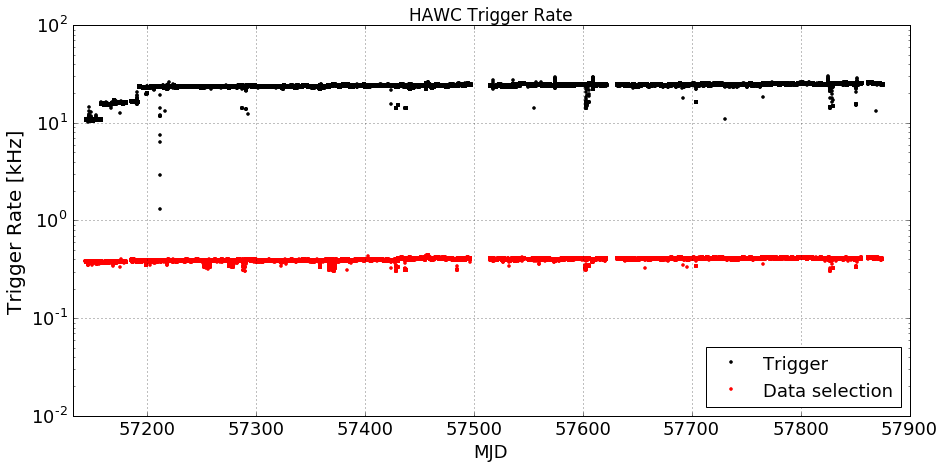

In [56]:
fig = plt.figure(figsize=(15,7))
ax = plt.subplot(111)
lang ={
    'eng':{
        'title':'HAWC Trigger Rate',
        'trigger_rate':'Trigger Rate',
        'selectionleg':'Data selection',
        'triggerleg':'Trigger',
        'trigger_hz':'Trigger Rate [kHz]',
        'mjd':'MJD'
    },
    'esp':{
        'title':'Tasa de disparo en HAWC',
        'trigger_rate':'Tasa de disparo',
        'selectionleg':'Tasa de selección',
        'triggerleg':'Tasa de disparo',
        'trigger_hz':'Tasa [kHz]',
        'mjd':'MJD'
    }
}
labels = lang['eng']

print labels

ax.plot(x , y/1e3, ".", label=labels['triggerleg'],color='black')
ax.plot(xc , yc/1e3, ".", label=labels['selectionleg'],color='red')
ax.set_ylim(.01, 100)
ax.set_xlim(57132, 57900)
plt.xlabel(labels['mjd'],fontsize=18); plt.ylabel(labels['trigger_hz'],fontsize=20); #plt.grid()
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)
ax.set_yscale("log")

ax.grid(True)
#x.set_title('Orientation relative to North: %u$^\circ$'%angle)
plt.legend(loc='lower right', numpoints=1, fontsize=18)
plt.title(labels['title'],fontsize=17)
#fig.savefig("imagenes/CRAI3HW2yr_ang_power_spectrum.pdf", dpi=100)

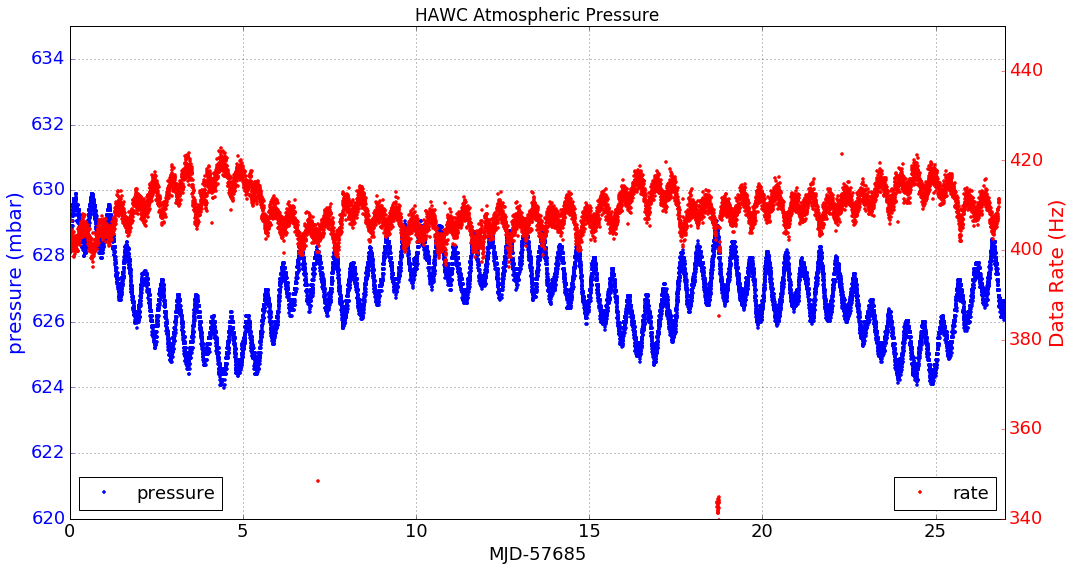

In [57]:
watermark=""
fig = plt.figure(figsize=(15,8))
ax1 = plt.subplot(111)

ax1.plot(xp-57685 ,yp, ".", label='pressure',color='blue')
ax1.set_ylim(620, 635)
#ax.set_xlim(57132, 57900)
ax1.set_xlim(0, 57707-57685)

ax1.text(57700, 633, watermark, alpha=0.3,ha= 'left', fontsize=26)

plt.xlabel('MJD-57685',fontsize=18); 
ax1.set_ylabel('pressure (mbar)',fontsize=20, color='b')
plt.legend(loc='lower left', numpoints=1, fontsize=18)
plt.grid()
for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(18)
ax1.tick_params('y', colors='b')
ax.grid(True)
ax2 = ax1.twinx()
ax2.plot(xc-57685 , yc, ".", label='rate',color='red')
#ax2.plot(xc[0:-184],np.array(ycorr),".", label='rate (pressure corrected)',color='grey')
ax2.set_ylim(340, 450)
ax2.set_xlim(0, 57712-57685)


ax2.tick_params('y', colors='r')
for item in (ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(18)
ax2.set_ylabel('Data Rate (Hz)',fontsize=20,color='red'); #
#x.set_title('Orientation relative to North: %u$^\circ$'%angle)
plt.title('HAWC Atmospheric Pressure',fontsize=17)
plt.legend(loc='lower right', numpoints=1, fontsize=18)
fig.tight_layout()
#fig.savefig("imagenes/CRAI3HW2yr_ang_power_spectrum.pdf", dpi=100)

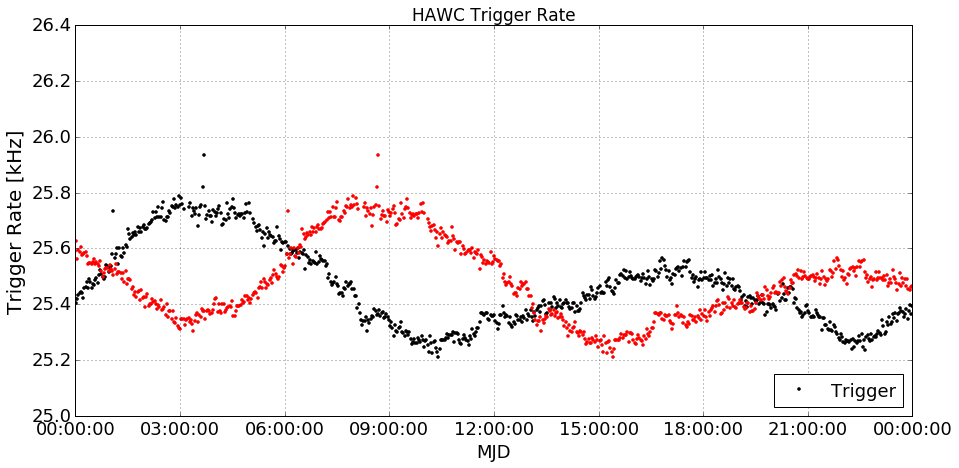

In [60]:
def convert_time(mjd):
    return time_from_unix(unix_from_mjd(mjd))
 


fig = plt.figure(figsize=(15,7))
ax = plt.subplot(111)
lang ={
    'eng':{
        'title':'HAWC Trigger Rate',
        'trigger_rate':'Trigger Rate',
        'selectionleg':'Data selection',
        'triggerleg':'Trigger',
        'trigger_hz':'Trigger Rate [kHz]',
        'mjd':'MJD'
    },
    'esp':{
        'title':'Tasa de disparo en HAWC',
        'trigger_rate':'Tasa de disparo',
        'selectionleg':'Tasa de selección',
        'triggerleg':'Tasa de disparo',
        'trigger_hz':'Tasa [kHz]',
        'mjd':'MJD'
    }
}

mxtime = mx.fromutc
labels = lang['eng']
ax.plot(map(convert_time,x) , y/1e3, ".", label=labels['triggerleg'],color='black')
ax.plot(np.array(map(convert_time,x))-tmx.utcoffset() , y/1e3, ".",color='red')

#ax.plot(map(convert_time,xc) , yc/1e3, ".", label=labels['selectionleg'],color='red')
ax.set_ylim(25, 26.4)
#ax.set_xlim(convert_time(57132), convert_time(57900))
ax.set_xlim(convert_time(57800), convert_time(57801))

plt.xlabel(labels['mjd'],fontsize=18); plt.ylabel(labels['trigger_hz'],fontsize=20); #plt.grid()
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)
#ax.set_yscale("log")

ax.grid(True)
#x.set_title('Orientation relative to North: %u$^\circ$'%angle)
plt.legend(loc='lower right', numpoints=1, fontsize=18)
plt.title(labels['title'],fontsize=17)
#fig.savefig("imagenes/CRAI3HW2yr_ang_power_spectrum.pdf", dpi=100)

In [61]:
def convert_time(mjd):
    return time_from_unix(unix_from_mjd(mjd))

print map(convert_time,np.array(x[1:10]))
print '---'
print map(utc_to_mx,map(convert_time,np.array(x[1:10])))

[datetime.datetime(2015, 5, 2, 2, 27, 5, 549658, tzinfo=<UTC>), datetime.datetime(2015, 5, 2, 2, 38, 33, 851029, tzinfo=<UTC>), datetime.datetime(2015, 5, 2, 2, 40, 38, 850560, tzinfo=<UTC>), datetime.datetime(2015, 5, 2, 2, 52, 0, 908423, tzinfo=<UTC>), datetime.datetime(2015, 5, 2, 2, 54, 5, 908190, tzinfo=<UTC>), datetime.datetime(2015, 5, 2, 3, 0, 30, 811915, tzinfo=<UTC>), datetime.datetime(2015, 5, 2, 3, 2, 35, 811798, tzinfo=<UTC>), datetime.datetime(2015, 5, 2, 3, 4, 40, 811839, tzinfo=<UTC>), datetime.datetime(2015, 5, 2, 3, 6, 45, 812068, tzinfo=<UTC>)]
---
[datetime.datetime(2015, 5, 1, 21, 27, 5, 549658, tzinfo=<DstTzInfo 'America/Mexico_City' CDT-1 day, 19:00:00 DST>), datetime.datetime(2015, 5, 1, 21, 38, 33, 851029, tzinfo=<DstTzInfo 'America/Mexico_City' CDT-1 day, 19:00:00 DST>), datetime.datetime(2015, 5, 1, 21, 40, 38, 850560, tzinfo=<DstTzInfo 'America/Mexico_City' CDT-1 day, 19:00:00 DST>), datetime.datetime(2015, 5, 1, 21, 52, 0, 908423, tzinfo=<DstTzInfo 'America

In [62]:
t = convert_time(57132)
print t
tmx = utc_to_mx(t)
print tmx
print t-tmx.utcoffset()

2015-04-20 00:00:00+00:00
2015-04-19 19:00:00-05:00
2015-04-20 05:00:00+00:00


In [63]:
mjd = 57132.3
print convert_time(mjd),is_night(convert_time(mjd))
print utc_to_mx(convert_time(mjd)), is_night(utc_to_mx(convert_time(mjd)))

2015-04-20 07:12:00+00:00 False
2015-04-20 02:12:00-05:00 True


In [64]:
utc_to_mx(convert_time(mjd)).utcoffset()

datetime.timedelta(-1, 68400)

In [65]:
def nighttime(x,y):
    newx=[]
    newy=[]
    for i in range(len(x)):
        if is_night(x[i]):
            newx.append(x[i])
            newy.append(y[i])
    return np.array(newx), np.array(newy)
            

In [66]:
def daytime(x,y):
    newx=[]
    newy=[]
    for i in range(len(x)):
        if not is_night(x[i]):
            newx.append(x[i])
            newy.append(y[i])
    return np.array(newx), np.array(newy)

In [67]:
xd, yd = daytime(np.array(map(convert_time,xc[0:-184]))-tmx.utcoffset(),ycorr)
#xd, yd = daytime(np.array(map(convert_time,x)),y)


In [68]:
xn, yn = nighttime(np.array(map(convert_time,xc[0:-184]))-tmx.utcoffset(),ycorr)
#xn, yn = nighttime(np.array(map(convert_time,x)),y)



In [69]:


xamx = np.array(map(convert_time,xa))-tmx.utcoffset()

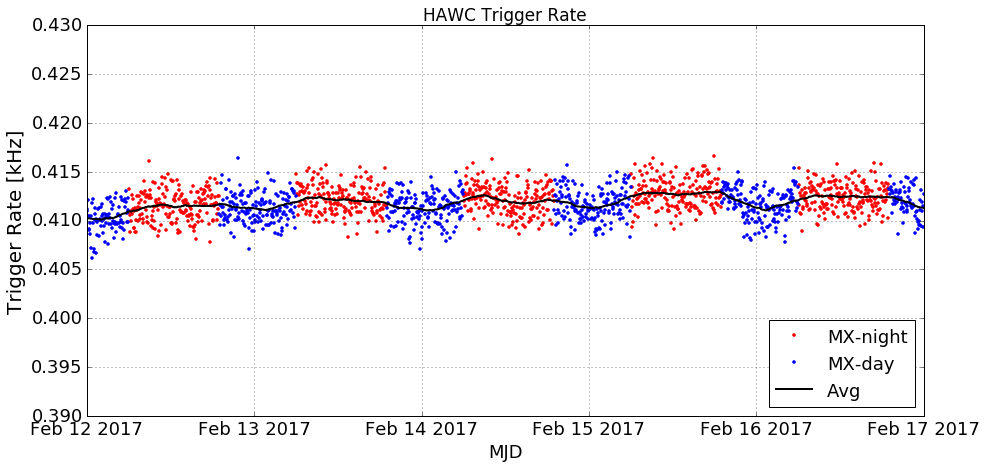

In [70]:
fig = plt.figure(figsize=(15,7))
ax = plt.subplot(111)

mxtime = mx.fromutc
labels = lang['eng']
#ax.plot(map(convert_time,x) , y/1e3, ".", label='UTF',color='black')
ax.plot(xd , yd/1e3, ".",color='red',label='MX-night')
ax.plot(xn , yn/1e3, ".",color='blue',label='MX-day')
ax.plot(xamx , moving_aves/1e3, "-",color='black',label='Avg', linewidth=2)

#ax.plot(map(convert_time,xc) , yc/1e3, ".", label=labels['selectionleg'],color='red')
ax.set_ylim(.39, .43)
#ax.set_xlim(convert_time(57132), convert_time(57900))
ax.set_xlim(convert_time(57796), convert_time(57801))

plt.xlabel(labels['mjd'],fontsize=18); plt.ylabel(labels['trigger_hz'],fontsize=20); #plt.grid()
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)
#ax.set_yscale("log")

ax.grid(True)
#x.set_title('Orientation relative to North: %u$^\circ$'%angle)
plt.legend(loc='lower right', numpoints=1, fontsize=18)
plt.title(labels['title'],fontsize=17)
#fig.savefig("imagenes/CRAI3HW2yr_ang_power_spectrum.pdf", dpi=100)

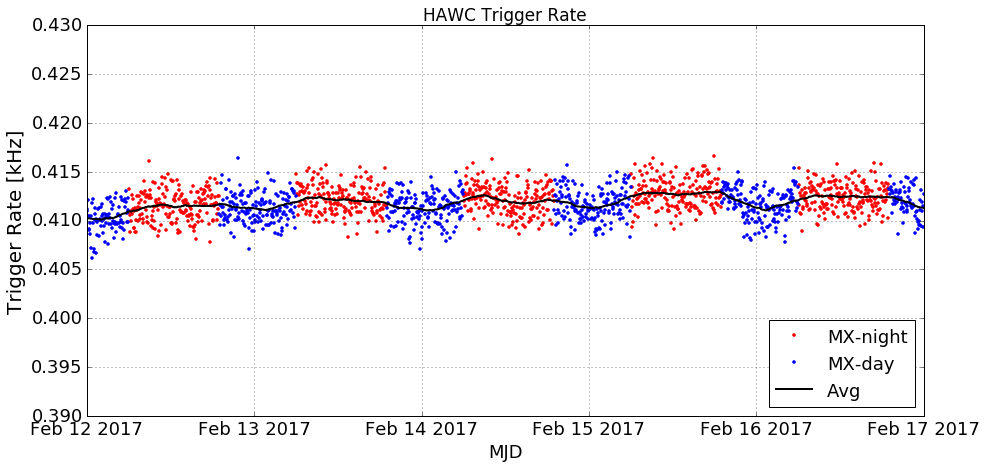

In [77]:
fig = plt.figure(figsize=(15,7))
ax = plt.subplot(111)

mxtime = mx.fromutc
labels = lang['eng']
#ax.plot(map(convert_time,x) , y/1e3, ".", label='UTF',color='black')
ax.plot(xd , yd/1e3, ".",color='red',label='MX-night')
ax.plot(xn , yn/1e3, ".",color='blue',label='MX-day')
ax.plot(xamx , moving_aves/1e3, "-",color='black',label='Avg', linewidth=2)

#ax.plot(map(convert_time,xc) , yc/1e3, ".", label=labels['selectionleg'],color='red')
ax.set_ylim(.39, .43)
#ax.set_xlim(convert_time(57132), convert_time(57900))
#ax.set_xlim(convert_time(57432), convert_time(57900))

ax.set_xlim(convert_time(57796), convert_time(57801))

plt.xlabel(labels['mjd'],fontsize=18); plt.ylabel(labels['trigger_hz'],fontsize=20); #plt.grid()
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)
#ax.set_yscale("log")

ax.grid(True)
#x.set_title('Orientation relative to North: %u$^\circ$'%angle)
plt.legend(loc='lower right', numpoints=1, fontsize=18)
plt.title(labels['title'],fontsize=17)
#fig.savefig("imagenes/CRAI3HW2yr_ang_power_spectrum.pdf", dpi=100)

In [276]:
norm = xa[-1] - xa[0] 
x24 = np.arange(24)
y24 = np.zeros(24)
for i in range(len(xa)):
    t = int(( (xa[i]-xa[0])%1 ) * 24)
    r = ycorr[i]/norm
    y24[t] += r
    

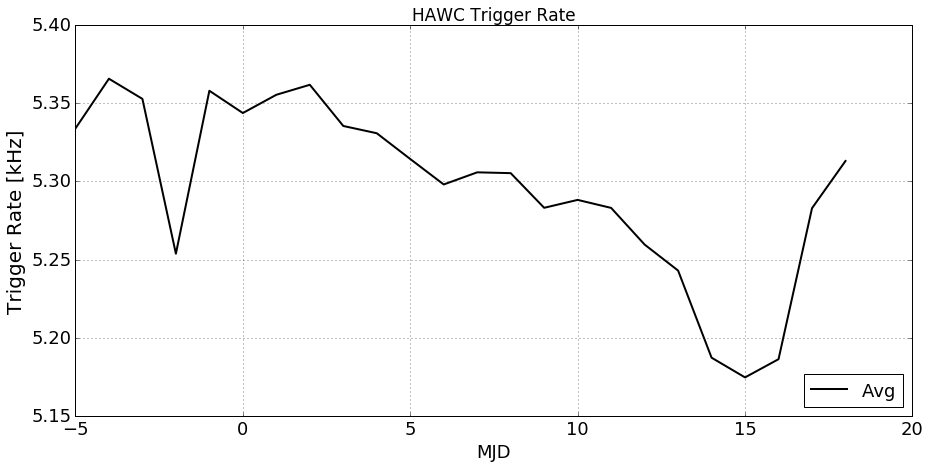

In [278]:
fig = plt.figure(figsize=(15,7))
ax = plt.subplot(111)

mxtime = mx.fromutc
labels = lang['eng']
ax.plot(x24-5 , y24/1e3, "-",color='black',label='Avg', linewidth=2)
#ax.set_ylim(.39, .43)
#ax.set_xlim(0,24)

plt.xlabel(labels['mjd'],fontsize=18); plt.ylabel(labels['trigger_hz'],fontsize=20); #plt.grid()
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(18)
#ax.set_yscale("log")

ax.grid(True)
#x.set_title('Orientation relative to North: %u$^\circ$'%angle)
plt.legend(loc='lower right', numpoints=1, fontsize=18)
plt.title(labels['title'],fontsize=17)
#fig.savefig("imagenes/CRAI3HW2yr_ang_power_spectrum.pdf", dpi=100)